In [ ]:
#Import Dependencies
import pandas as pd
import numpy as np
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#salary vs birthplace - CG - Done
#salary vs pts per game - CG - Done
#salary vs GWG - CB - Done
#salary vs Age - CB - Done
#salary vs Penalties - JW - Done
#salary vs overall draft - JW - Done

In [ ]:
#read in the csv database 
nhl_df = pd.read_csv("nhlstats.csv")

In [ ]:
#remove RFA players
ufa_df = nhl_df.loc[nhl_df["Status"] == "UFA"]

In [5]:
#drop NaN's
ufa_df = ufa_df.dropna()
ufa_df.head()

,Player Id,Age,Nationality,Over All Draft,Last Name,First Name,Position,Team,GP,Goals,Assists,Points,PlusMinus,PIM,GWG,Status,Salary
1,8471716,30,USA,42.0,Abdelkader,Justin,LW/RW,DET,64,7,14,21,-20,50,1,UFA,5500000.0
4,8475844,25,USA,140.0,Agostino,Kenny,LW,STL,7,1,2,3,0,2,0,UFA,625000.0
6,8473991,29,CAN,5.0,Alzner,Karl,D,WSH,82,3,10,13,23,28,0,UFA,2800000.0
11,8473573,29,RUS,54.0,Anisimov,Artem,C/LW,CHI,64,22,23,45,9,30,7,UFA,5750000.0
16,8474715,28,USA,157.0,Atkinson,Cam,RW,CBJ,82,35,27,62,13,22,9,UFA,3500000.0


In [6]:
ufa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 1 to 882
Data columns (total 17 columns):
Player Id         399 non-null int64
Age               399 non-null int64
Nationality       399 non-null object
Over All Draft    399 non-null float64
Last Name         399 non-null object
First Name        399 non-null object
Position          399 non-null object
Team              399 non-null object
GP                399 non-null int64
Goals             399 non-null int64
Assists           399 non-null int64
Points            399 non-null int64
PlusMinus         399 non-null int64
PIM               399 non-null int64
GWG               399 non-null int64
Status            399 non-null object
Salary            399 non-null float64
dtypes: float64(2), int64(9), object(6)
memory usage: 56.1+ KB


In [7]:
#### Salary vs. Birthplace ####
#Calculate number of players per country and display, so to find out how many players are in each country
ufa_df["Nationality"].value_counts()

CAN    198
USA    108
SWE     39
CZE     15
RUS     10
FIN     10
CHE      5
DNK      5
SVK      4
DEU      2
AUT      2
SVN      1
Name: Nationality, dtype: int64

In [8]:
#Replace countries with less than 10 players to OTH or "other"
ufa_df = ufa_df.replace(['DNK','DEU','FRA','AUT','NOR','SVN','HRV','GBR','LVA','CHE','SVK'],['OTH','OTH','OTH','OTH','OTH','OTH','OTH','OTH','OTH','OTH','OTH'])

In [9]:
ufa_df.head()

,Player Id,Age,Nationality,Over All Draft,Last Name,First Name,Position,Team,GP,Goals,Assists,Points,PlusMinus,PIM,GWG,Status,Salary
1,8471716,30,USA,42.0,Abdelkader,Justin,LW/RW,DET,64,7,14,21,-20,50,1,UFA,5500000.0
4,8475844,25,USA,140.0,Agostino,Kenny,LW,STL,7,1,2,3,0,2,0,UFA,625000.0
6,8473991,29,CAN,5.0,Alzner,Karl,D,WSH,82,3,10,13,23,28,0,UFA,2800000.0
11,8473573,29,RUS,54.0,Anisimov,Artem,C/LW,CHI,64,22,23,45,9,30,7,UFA,5750000.0
16,8474715,28,USA,157.0,Atkinson,Cam,RW,CBJ,82,35,27,62,13,22,9,UFA,3500000.0


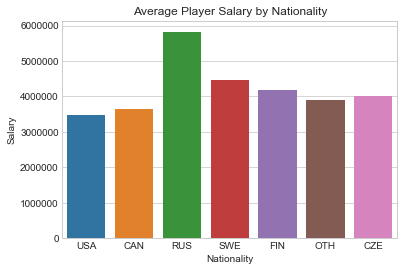

In [10]:
#Display chart (Salary to Country)
sns.set_style("whitegrid")
chart1 = sns.barplot(x = "Nationality", y = "Salary", data = ufa_df, ci = 0)
plt.title("Average Player Salary by Nationality")
plt.show()

In [11]:
#draft_plot = plt.scatter(x = ufa_df['ride_count'], y = urban['fare'], s = urban['driver_count'] * 5, alpha = 0.75,
#                        edgecolors = 'black', color = 'lightcoral', label = 'Urban')

In [12]:
#add column for points per game, calculate points per game, and fill cells with answer
ufa_df["Points per Game"] = round(ufa_df["Points"] / ufa_df["GP"],3)

In [13]:
ufa_df.head()

,Player Id,Age,Nationality,Over All Draft,Last Name,First Name,Position,Team,GP,Goals,Assists,Points,PlusMinus,PIM,GWG,Status,Salary,Points per Game
1,8471716,30,USA,42.0,Abdelkader,Justin,LW/RW,DET,64,7,14,21,-20,50,1,UFA,5500000.0,0.328
4,8475844,25,USA,140.0,Agostino,Kenny,LW,STL,7,1,2,3,0,2,0,UFA,625000.0,0.429
6,8473991,29,CAN,5.0,Alzner,Karl,D,WSH,82,3,10,13,23,28,0,UFA,2800000.0,0.159
11,8473573,29,RUS,54.0,Anisimov,Artem,C/LW,CHI,64,22,23,45,9,30,7,UFA,5750000.0,0.703
16,8474715,28,USA,157.0,Atkinson,Cam,RW,CBJ,82,35,27,62,13,22,9,UFA,3500000.0,0.756


In [14]:
ufa_df["FWD/DEF"] = ufa_df["Position"]

In [15]:
replace_position = {"D": "D",
                    "C": "F",
                    "RW": "F",
                    "LW": "F",
                    "C/LW": "F",
                    "LW/C": "F",
                    "C/RW": "F",
                    "RW/C": "F",
                    "LW/RW": "F",
                    "RW/LW": "F",
                    "C/LW/RW": "F",
                    "C/RW/LW": "F",
                    "LW/C/RW": "F",
                    "LW/RW/C": "F",
                    "RW/C/LW": "F",
                    "RW/LW/C": "F",
                    "D/RW": "D",
                    "RW/D": "D",
                    "D/LW": "D",
                    "LW/D": "D",
                    "C/D": "D",
                    "D/C": "D",
                    "C/LW/C":"F"}
ufa_df
ufa_df.loc[:,"FWD/DEF"] = ufa_df["FWD/DEF"].map(replace_position)

In [16]:
ufa_df.head()

,Player Id,Age,Nationality,Over All Draft,Last Name,First Name,Position,Team,GP,Goals,Assists,Points,PlusMinus,PIM,GWG,Status,Salary,Points per Game,FWD/DEF
1,8471716,30,USA,42.0,Abdelkader,Justin,LW/RW,DET,64,7,14,21,-20,50,1,UFA,5500000.0,0.328,F
4,8475844,25,USA,140.0,Agostino,Kenny,LW,STL,7,1,2,3,0,2,0,UFA,625000.0,0.429,F
6,8473991,29,CAN,5.0,Alzner,Karl,D,WSH,82,3,10,13,23,28,0,UFA,2800000.0,0.159,D
11,8473573,29,RUS,54.0,Anisimov,Artem,C/LW,CHI,64,22,23,45,9,30,7,UFA,5750000.0,0.703,F
16,8474715,28,USA,157.0,Atkinson,Cam,RW,CBJ,82,35,27,62,13,22,9,UFA,3500000.0,0.756,F


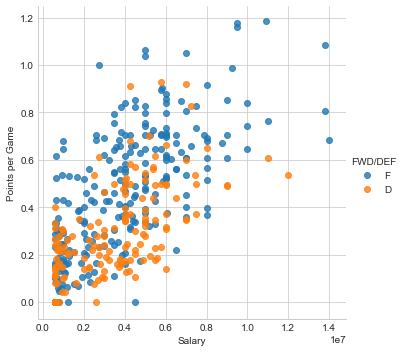

In [17]:
#If to look at by team, then we need to drop the slashes "DAL/ANA" to 'ANA'
#Plot the scatterplot 
sns.lmplot(x = "Salary", y = "Points per Game", data = ufa_df, hue="FWD/DEF", fit_reg=False)
plt.show()

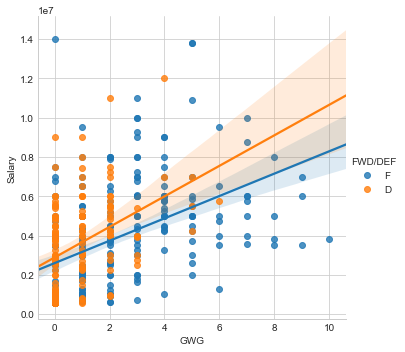

In [34]:
#Create scatterplot for game winning goals to salary
sns.lmplot(x = "GWG", y = "Salary", data = ufa_df, hue="FWD/DEF")
plt.show()

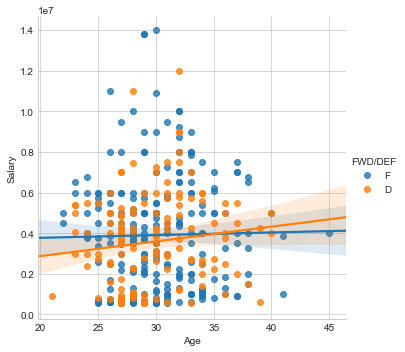

In [42]:
#Create scatterplot for age to salary
sns.lmplot(x = "Age", y = "Salary", data = ufa_df, hue="FWD/DEF")
plt.show()

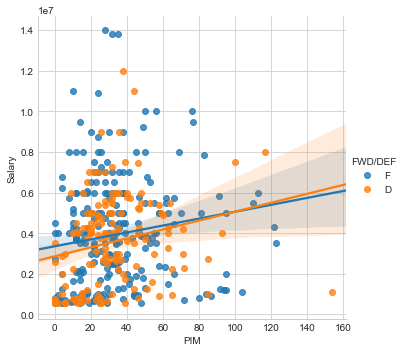

In [43]:
#Create scatterplot for penalties to salary
sns.lmplot(x = "PIM", y = "Salary", data = ufa_df, hue="FWD/DEF")
plt.show()

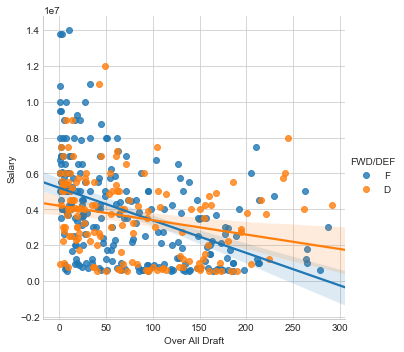

In [44]:
#Create scatterplot for salary to overall draft
sns.lmplot(x = "Over All Draft", y = "Salary", data = ufa_df, hue="FWD/DEF")
plt.show()